<a href="https://colab.research.google.com/github/GustavoCarvalho25/IA-Material/blob/master/PredicoesABC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pandas
import matplotlib.pyplot as matplotlib
import seaborn as seaborn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [ ]:
data = pandas.read_csv("/data1_train.csv")

In [ ]:
data

,A1,A2,A3,A4,CLASS
0,5.1,3.5,1.4,0.2,A
1,4.6,3.1,1.5,0.2,A
2,5.0,3.6,1.4,0.2,A
3,4.6,3.4,1.4,0.3,A
4,4.8,3.4,1.6,0.2,A
...,...,...,...,...,...
85,6.9,3.1,5.1,2.3,C
86,6.8,3.2,5.9,2.3,C
87,6.7,3.3,5.7,2.5,C
88,6.7,3.0,5.2,2.3,C


In [ ]:
def plot_a1_vs_a2_por_classe(data):
    fig = data[data.CLASS == 'A'].plot(
        kind='scatter', x='A1', y='A2', color='orange', label='A'
    )
    data[data.CLASS == 'B'].plot(
        kind='scatter', x='A1', y='A2', color='blue', label='B', ax=fig
    )
    data[data.CLASS == 'C'].plot(
        kind='scatter', x='A1', y='A2', color='green', label='C', ax=fig
    )

    fig.set_xlabel("A1")
    fig.set_ylabel("A2")
    fig.set_title("A1 VS A2")

    grafico = matplotlib.gcf()
    grafico.set_size_inches(10, 6)
    matplotlib.show()

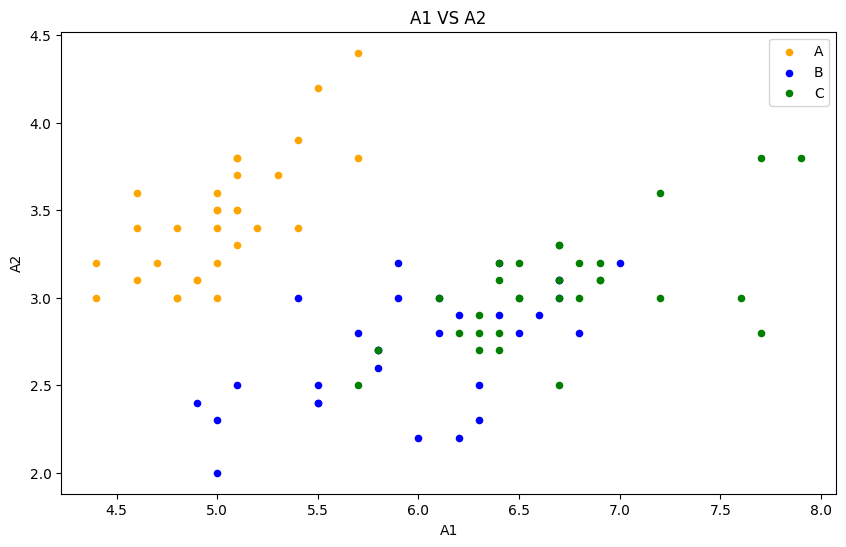

In [ ]:
plot_a1_vs_a2_por_classe(data)

In [ ]:
dados_treino = pandas.read_csv('/data1_train.csv')

In [ ]:
X_treino = dados_treino[['A1', 'A2', 'A3', 'A4']]
y_treino = dados_treino['CLASS']

In [ ]:
codificador_classe = LabelEncoder()
y_treino_codificado = codificador_classe.fit_transform(y_treino)

In [ ]:
modelo_knn = KNeighborsClassifier(n_neighbors=3)
modelo_knn.fit(X_treino, y_treino_codificado)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
dados_teste = pandas.read_csv('/data1_test.csv')

In [ ]:
X_teste = dados_teste[['A1', 'A2', 'A3', 'A4']]
y_teste_predito_codificado = modelo_knn.predict(X_teste)

In [ ]:
y_teste_predito = codificador_classe.inverse_transform(y_teste_predito_codificado)

In [ ]:
dados_teste_com_previsoes = dados_teste.copy()
dados_teste_com_previsoes['CLASS_Predito'] = y_teste_predito

In [ ]:
print(dados_teste_com_previsoes.head())

    A1   A2   A3   A4 CLASS_Predito
0  5.6  2.8  4.9  2.0             C
1  4.9  2.5  4.5  1.7             B
2  5.7  3.0  4.2  1.2             B
3  7.7  2.6  6.9  2.3             C
4  5.8  2.8  5.1  2.4             C
